In [3]:
import numpy as np
from os.path import dirname, abspath, join as pjoin
from Corrfunc.theory.DD import DD
from Corrfunc.io import read_catalog
from Corrfunc.utils import convert_3d_counts_to_cf
from Corrfunc.mocks import *
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import glob, time 

from astropy.io import fits as fits
from astropy.table import Table, vstack
from astropy import constants as const
from astropy import units as u
from astropy.table import QTable

import healpy as hp
import math

import sys
sys.path.append('/global/homes/l/lbigwood/LSS/py')
import LSS
import LSS.SV3
import LSS.SV3.cattools as cattools

from desitarget.targets import desi_mask, bgs_mask, mws_mask 
from desitarget.geomask import get_imaging_maskbits 

First I trial it with the catalog they provide: 

In [24]:
# Read the supplied galaxies on a periodic box
X, Y, Z = read_catalog()
N = len(X)
boxsize = 420.0
nthreads = 2

# Generate randoms on the box
rand_N = 3*N
rand_X = np.random.uniform(0, boxsize, rand_N)
rand_Y = np.random.uniform(0, boxsize, rand_N)
rand_Z = np.random.uniform(0, boxsize, rand_N)

# Setup the bins
nbins = 10
bins = np.linspace(0.1, 10.0, nbins + 1) # note that +1 to nbins

# Auto pair counts in DD
autocorr=1
DD_counts = DD(autocorr, nthreads, bins, X, Y, Z, periodic=False, verbose=True)

# Cross pair counts in DR
autocorr=0
DR_counts = DD(autocorr, nthreads, bins, X, Y, Z, X2=rand_X, Y2=rand_Y, Z2=rand_Z, periodic=False, verbose=True)

# Auto pairs counts in RR
autocorr=1
RR_counts = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)

# All the pair counts are done, get the correlation function
cf = convert_3d_counts_to_cf(N, N, rand_N, rand_N,DD_counts, DR_counts,DR_counts, RR_counts)



In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.078 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.865 secs
ND1 =      1235904 [xmin,ymin,zmin] = [0.000400,0.000100,0.000300], [xmax,ymax,zmax] = [419.999817,419.999512,419.999207]
ND2 =      3707712 [xmin,ymin,zmin] = [0.000066,0.000100,0.000150], [xmax,ymax,zmax] = [419.999973,419.999910,419.999574]
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.071 sec
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.733 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  3.050 secs
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.737 sec
0%.........10%.........20%.........30%........

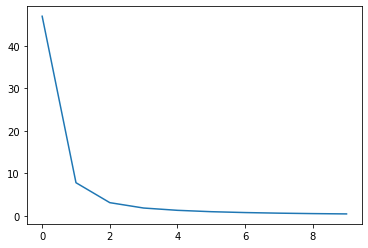

In [9]:
plt.plot(cf)

Trying to find the projected correlation function for mxxl:

In [4]:
import numpy as np
import Corrfunc
from Corrfunc.mocks.DDrppi_mocks import DDrppi_mocks
from Corrfunc.io import read_catalog
from Corrfunc.utils import convert_rp_pi_counts_to_wp
from astropy.cosmology import WMAP9 as cosmo
 

# Read the supplied galaxies on a periodic box
f = fits.open('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v0.9.fits')
mxxl=f[1].data

RA = mxxl['RA'][:1000]
DEC = mxxl['DEC'][:1000]
CZ = np.array(cosmo.comoving_distance(mxxl['Z']))[:1000]
N = len(RA)

# Read the supplied randoms catalog
f = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
random1=f[1].data

rand_RA = random1['RA'][:1000]
rand_DEC = random1['DEC'][:1000]

rand_CZ= np.array(list(CZ))
np.random.shuffle(rand_CZ)
rand_N = len(rand_RA)




# Setup the bins
nbins = 10
bins = np.linspace(0.1, 20.0, nbins + 1)
pimax = 40.0

cosmology = 1
nthreads = 2

# Auto pair counts in DD
autocorr=1
DD_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, bins,RA, DEC, CZ)


# Cross pair counts in DR
autocorr=0
DR_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, bins,RA, DEC, CZ,RA2=rand_RA, DEC2=rand_DEC, CZ2=rand_CZ)


# Auto pairs counts in RR
autocorr=1
RR_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, bins,rand_RA, rand_DEC, rand_CZ)

# All the pair counts are done, get the angular correlation function
wp = convert_rp_pi_counts_to_wp(N, N, rand_N, rand_N,DD_counts, DR_counts,DR_counts, RR_counts, nbins, pimax)

/global/homes/l/lbigwood/.local/lib/python3.8/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


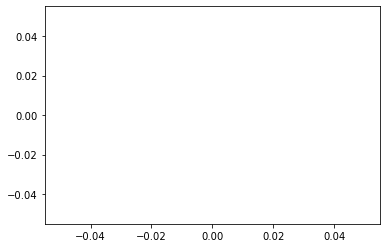

In [5]:
plt.plot(wp)

I'm also trying to find the angular correlation function below, but also no luck.

In [ ]:
#angular correlation function for mock data.  This is based on SV3 so use different randoms 

import numpy as np
import Corrfunc
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf

# Read the supplied galaxies on a periodic box
f = fits.open('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v0.9.fits')
mxxl=f[1].data

RA = mxxl['RA'][:1000]
DEC = mxxl['DEC'][:1000]

# Read the supplied randoms catalog
f = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
random1=f[1].data

rand_RA = random1['RA'][:1000]
rand_DEC = random1['DEC'][:1000]
rand_N = len(rand_RA)

# Setup the bins
nbins = 10
bins = np.linspace(0.001, 10.0, nbins + 1) # note the +1 to nbins

# Number of threads to use
nthreads = 2

# Auto pair counts in DD
autocorr=1
DD_counts = DDtheta_mocks(autocorr, nthreads, bins,RA, DEC)

# Cross pair counts in DR
autocorr=0
DR_counts = DDtheta_mocks(autocorr, nthreads, bins,RA, DEC,RA2=rand_RA, DEC2=rand_DEC)

# Auto pairs counts in RR
autocorr=1
RR_counts = DDtheta_mocks(autocorr, nthreads, bins, rand_RA, rand_DEC)

# All the pair counts are done, get the angular correlation function
wtheta = convert_3d_counts_to_cf(N, N, rand_N, rand_N, DD_counts, DR_counts,DR_counts, RR_counts)